In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Data Exploration and Preprocessing

In [62]:
df = pd.read_csv(r"C:\Users\musta\Downloads\Wine_clust .csv")

In [63]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [65]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# Step 2: Data Preprocessing

In [66]:
numerical_features = df.drop(columns=['Proline'])

In [67]:
# Standardize the numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Step 3: Clustering Models

 **.K-means Clustering**

In [68]:
# Initialize an empty list to store the inertia values
inertia = []

In [69]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_features_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\musta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


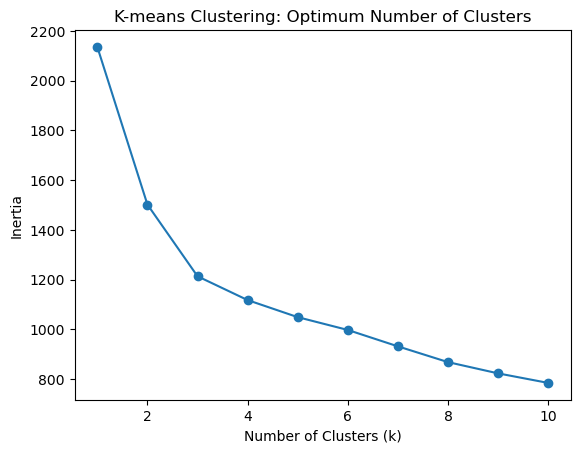

In [70]:
# Plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-means Clustering: Optimum Number of Clusters')
plt.show()


**.Agglomerative Clustering**

In [71]:
linkage_matrix = linkage(numerical_features_scaled, method='ward')

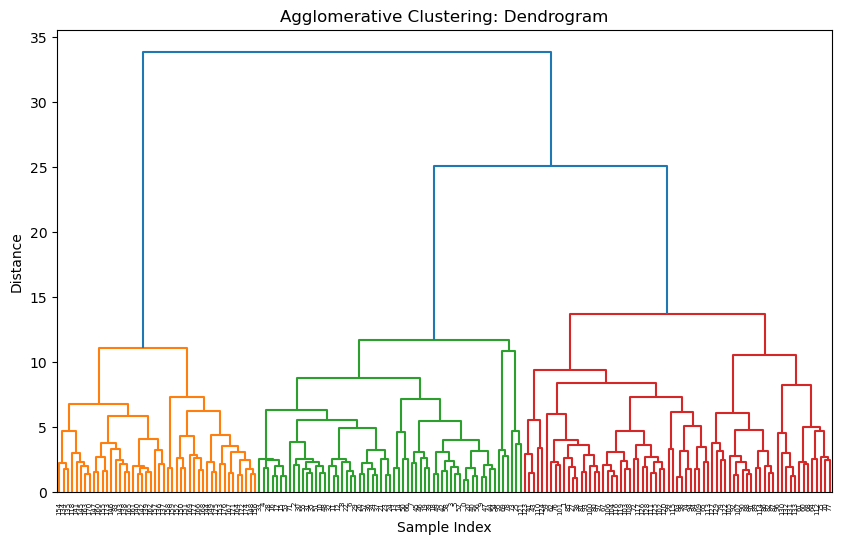

In [72]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Agglomerative Clustering: Dendrogram')
plt.show()

# Step 4: Optimum Clustering Model

In [73]:
# Create the K-means clustering model with k=3
kmeans_optimum = KMeans(n_clusters=3, random_state=42)
kmeans_optimum.fit(numerical_features_scaled)

KMeans(n_clusters=3, random_state=42)

In [74]:
# Assign the cluster labels to the original dataset
df['Cluster'] = kmeans_optimum.labels_

In [75]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


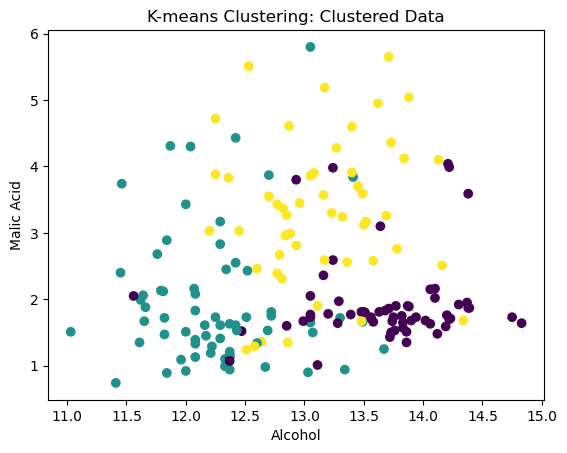

In [76]:
# Scatter plot of clusters based on two features
plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['Cluster'])
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means Clustering: Clustered Data')
plt.show()

# Step 5: DBSCAN Clustering


In [77]:
# Create the DBSCAN clustering model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(numerical_features_scaled)

DBSCAN()

In [78]:
df['Cluster_DBSCAN'] = dbscan.labels_

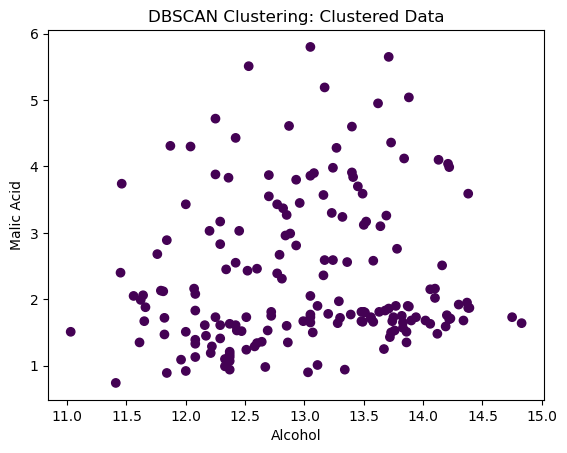

In [79]:
# Scatter plot of clusters based on two features
plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['Cluster_DBSCAN'])
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('DBSCAN Clustering: Clustered Data')
plt.show()
